# Classifying Player Positions

The objective is try to classificate player in the three position that appears in the Euroleague stats: guards, forwards and centers. We are going to work from the average data of the players extracted with the previous part of scrapping.

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, neighbors, ensemble
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation
The first part, as always, includes data loading and filtering. We are going to use only the following stats for posterior classification: 
* Avg: points average
* 2FG_%: 2 points shooting percentage
* 3FG_%: 3 points shooting percentage
* FT_%:  free throw shooting percentage
* Reb: rebounds
* St: steals
* As: assits
* Bl: blocks

In [2]:
sFolder = '/Users/alvar/Documents/GitHub/Brown-Euroleague/Data/'
featureVecsPd = pd.read_csv(sFolder + "euroleaguePlayers_average.csv",delimiter=',')
#filter NA values
featureVecsPd =  featureVecsPd.dropna() #me modifica los valores, na...solo quiero eliminar las filas con algun na

#important columns
indexs = [11,13,15,17,18,19,20,21]

#extract features
featureVecs = featureVecsPd.iloc[:,[11,13,15,17,18,19,20,21]].to_numpy()

#Get colnames
colNames = [featureVecsPd.columns.tolist()[index] for index in indexs]

# Get Names and Position
labNames = featureVecsPd.iloc[:,0].to_numpy().tolist()
labPosCat = featureVecsPd.iloc[:,5].to_numpy()

In [3]:
#postion character to number (for ML algoriths)
labPos = np.where(labPosCat == "Guard", 0, labPosCat)
labPos = np.where(labPos == "Forward", 1, labPos)
labPos = np.where(labPos == "Center", 2, labPos)
labPos = labPos.tolist()

In [4]:
#see and exemple of player
sPlayer = 'LLULL, SERGIO'
print(sPlayer + ' Position: ' + str(labPos[labNames.index(sPlayer)]))
print('Column names: ' + str(colNames))
print(sPlayer + ' Features: ' + str(featureVecs[labNames.index(sPlayer)]))

LLULL, SERGIO Position: 0
Column names: ['Avg', '2FG_%', '3FG_%', 'FT_%', 'Reb', 'St', 'As', 'Bl']
LLULL, SERGIO Features: [10.5 49.5 34.2 82.5  1.7  0.6  3.8  0.1]


## Machine Learning algorithms

Before train the models, we have to split the data between training data and test data. I use 80/20 proportion in a single fold.



In [5]:
featVecs_train, featVecs_test, labels_train,labels_test, names_train, names_test = train_test_split(featureVecs, labPos,labNames, test_size=0.2, random_state=0)

Scikit-learn has a bunch of possible classifiers to be used in this kind of scenario (https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

I will stick to Support Vector Machines, K-Neighbors and RandomForest without tunning the hyperparametres, only adjusting a few but not using a grid search for the best ones.

### Support Vector Machine

Accuracy train SVM: 0.6184
Accuracy test SVM: 0.6923


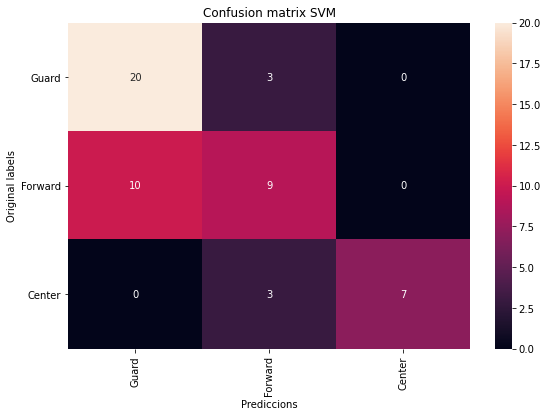

Classification Report SVM
              precision    recall  f1-score   support

       Guard       0.67      0.87      0.75        23
     Forward       0.60      0.47      0.53        19
      Center       1.00      0.70      0.82        10

    accuracy                           0.69        52
   macro avg       0.76      0.68      0.70        52
weighted avg       0.71      0.69      0.69        52



In [6]:
# Classifie
clf = svm.SVC(random_state=1)
#Train
clf.fit(featVecs_train, labels_train)
#Predict
pred_train = clf.predict(featVecs_train)
pred_test = clf.predict(featVecs_test)

#Accuracy
print('Accuracy train SVM: ' + str(accuracy_score(labels_train, pred_train).round(4)))
print('Accuracy test SVM: ' + str(accuracy_score(labels_test, pred_test).round(4)))

#Confusion Matrix
cm = confusion_matrix(y_true =labels_test,
                      y_pred =pred_test, labels=[0,1,2])


ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  
# labels, title and ticks
lbls = list(["Guard", "Forward", "Center"])
ax.set_xlabel('Prediccions')
ax.set_ylabel('Original labels')
ax.set_title('Confusion matrix SVM')
ax.xaxis.set_ticklabels(lbls) 
plt.xticks(rotation=90)
plt.yticks(np.arange(0.5, 3.5, 1.0))
ax.yaxis.set_ticklabels(lbls)
plt.yticks(rotation=0)

plt.gcf().set_size_inches(9, 6)
plt.show()

#Clasification Report
print("Classification Report SVM")
print(classification_report(labels_test, pred_test, target_names=["Guard", "Forward", "Center"]))

In [7]:
#Print failure cases
for iTest in range(0, len(featVecs_test)):
    pred = pred_test[iTest]
    if pred != labels_test[iTest]:
        print(str(names_test[iTest]) + ' - Predicted: ' + str(pred) + ', Real: ' + str(labels_test[iTest]))

KARASEV, SERGEY - Predicted: 0, Real: 1
BALBAY, DOGUS - Predicted: 1, Real: 0
CLYBURN, WILL - Predicted: 0, Real: 1
VESELY, JAN - Predicted: 1, Real: 2
SIMONOVIC, MARKO - Predicted: 0, Real: 1
KAHUDI, CHARLES - Predicted: 0, Real: 1
MILUTINOV, NIKOLA - Predicted: 1, Real: 2
JAGODIC-KURIDZA, MARKO - Predicted: 0, Real: 1
PIERRE, DYSHAWN - Predicted: 0, Real: 1
MORETTI, DAVIDE - Predicted: 1, Real: 0
FONTECCHIO, SIMONE - Predicted: 0, Real: 1
JOVIC, STEFAN - Predicted: 1, Real: 0
SINGLETON, CHRIS - Predicted: 0, Real: 1
ANTONOV, SEMEN - Predicted: 0, Real: 1
BOOKER, DEVIN - Predicted: 1, Real: 2
MONIA, SERGEY - Predicted: 0, Real: 1


#### Comments
accuracy of the model is not bad, 69% of the players in the proper position. We see that the different position are not complety balanced, this can give us problems with the accuracy.


### K Neighbors Classifier



Accuracy train KNeighborsClassifier: 0.7101
Accuracy test KNeighborsClassifier: 0.6923


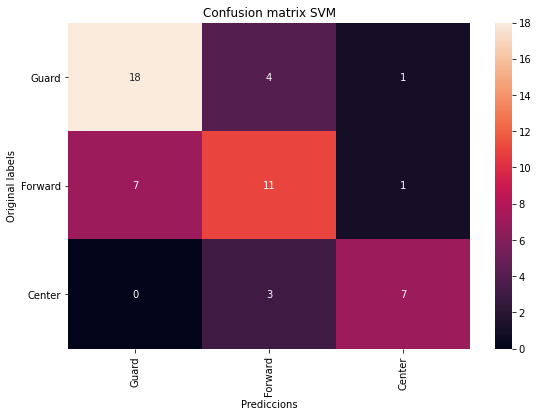

Clasification report KNeighborsClassifier
              precision    recall  f1-score   support

       Guard       0.72      0.78      0.75        23
     Forward       0.61      0.58      0.59        19
      Center       0.78      0.70      0.74        10

    accuracy                           0.69        52
   macro avg       0.70      0.69      0.69        52
weighted avg       0.69      0.69      0.69        52

KARASEV, SERGEY - Predicted: 0, Real: 1
THOMAS, WILL - Predicted: 2, Real: 1
PUERTO, JOSEP - Predicted: 2, Real: 0
SASTRE, JOAN - Predicted: 1, Real: 0
MILUTINOV, NIKOLA - Predicted: 1, Real: 2
JAGODIC-KURIDZA, MARKO - Predicted: 0, Real: 1
VAN ROSSOM, SAM - Predicted: 1, Real: 0
PIERRE, DYSHAWN - Predicted: 0, Real: 1
MORETTI, DAVIDE - Predicted: 1, Real: 0
SAYBIR, YIGITCAN - Predicted: 0, Real: 1
FONTECCHIO, SIMONE - Predicted: 0, Real: 1
JOVIC, STEFAN - Predicted: 1, Real: 0
SINGLETON, CHRIS - Predicted: 0, Real: 1
ANTONOV, SEMEN - Predicted: 0, Real: 1
BOOKER, DEVIN 

In [8]:
# Classifie
clf = neighbors.KNeighborsClassifier(n_neighbors= 5)
# Train
clf.fit(featVecs_train, labels_train)

#Predict
pred_train = clf.predict(featVecs_train)
pred_test = clf.predict(featVecs_test)

#Accuracy
print('Accuracy train KNeighborsClassifier: ' + str(accuracy_score(labels_train, pred_train).round(4)))
print('Accuracy test KNeighborsClassifier: ' + str(accuracy_score(labels_test, pred_test).round(4)))

#Confusion Matrix 
cm = confusion_matrix(y_true =labels_test,
                      y_pred =pred_test, labels=[0,1,2])


ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  
# labels, title and ticks
lbls = list(["Guard", "Forward", "Center"])
ax.set_xlabel('Prediccions')
ax.set_ylabel('Original labels')
ax.set_title('Confusion matrix SVM')
ax.xaxis.set_ticklabels(lbls) 
plt.xticks(rotation=90)
plt.yticks(np.arange(0.5, 3.5, 1.0))
ax.yaxis.set_ticklabels(lbls)
plt.yticks(rotation=0)

plt.gcf().set_size_inches(9, 6)
plt.show()

#Classification Report
print("Clasification report KNeighborsClassifier")
print(classification_report(labels_test, pred_test, target_names=["Guard", "Forward", "Center"]))

#Print failure cases
for iTest in range(0, len(featVecs_test)):
    pred = pred_test[iTest]
    if pred != labels_test[iTest]:
        print(str(names_test[iTest]) + ' - Predicted: ' + str(pred) + ', Real: ' + str(labels_test[iTest]))

#### Comments
This models fits than SVM and also is not overfitted. I'm not appreciate big differents in the results

### Random Forest Classifier

Accuracy train RandomForestClassifier: 0.9855
Accuracy test RandomForestClassifier: 0.7885


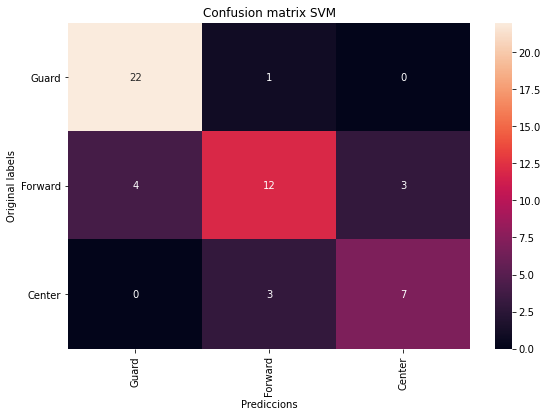

Clasification report RandomForestClassifier
              precision    recall  f1-score   support

       Guard       0.85      0.96      0.90        23
     Forward       0.75      0.63      0.69        19
      Center       0.70      0.70      0.70        10

    accuracy                           0.79        52
   macro avg       0.77      0.76      0.76        52
weighted avg       0.78      0.79      0.78        52

YABUSELE, GUERSCHON - Predicted: 2, Real: 1
KARASEV, SERGEY - Predicted: 0, Real: 1
VEZENKOV, SASHA - Predicted: 2, Real: 1
MAHMUTOGLU, MELIH - Predicted: 1, Real: 0
JAGODIC-KURIDZA, MARKO - Predicted: 2, Real: 1
PIERRE, DYSHAWN - Predicted: 0, Real: 1
RADOSEVIC, LEON - Predicted: 1, Real: 2
SAYBIR, YIGITCAN - Predicted: 0, Real: 1
FONTECCHIO, SIMONE - Predicted: 0, Real: 1
BOOKER, DEVIN - Predicted: 1, Real: 2
NIKIC, KRESIMIR - Predicted: 1, Real: 2


In [9]:
# Classifie
clf = ensemble.RandomForestClassifier(random_state=1)
# Train
clf.fit(featVecs_train, labels_train)

#Predict
pred_train = clf.predict(featVecs_train)
pred_test = clf.predict(featVecs_test)

#Accuracy
print('Accuracy train RandomForestClassifier: ' + str(accuracy_score(labels_train, pred_train).round(4)))
print('Accuracy test RandomForestClassifier: ' + str(accuracy_score(labels_test, pred_test).round(4)))


#Confusion Matrix 
cm = confusion_matrix(y_true =labels_test,
                      y_pred =pred_test, labels=[0,1,2])


ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax)  
# labels, title and ticks
lbls = list(["Guard", "Forward", "Center"])
ax.set_xlabel('Prediccions')
ax.set_ylabel('Original labels')
ax.set_title('Confusion matrix SVM')
ax.xaxis.set_ticklabels(lbls) 
plt.xticks(rotation=90)
plt.yticks(np.arange(0.5, 3.5, 1.0))
ax.yaxis.set_ticklabels(lbls)
plt.yticks(rotation=0)

plt.gcf().set_size_inches(9, 6)
plt.show()

#Classification Report
print("Clasification report RandomForestClassifier")
print(classification_report(labels_test, pred_test, target_names=["Guard", "Forward", "Center"]))

#Print failure cases
for iTest in range(0, len(featVecs_test)):
    pred = pred_test[iTest]
    if pred != labels_test[iTest]:
        print(str(names_test[iTest]) + ' - Predicted: ' + str(pred) + ', Real: ' + str(labels_test[iTest]))

#### Comments
This model is the best, but it's overfitted. I should do finetunning in this model to not have overfitting.


## Visualization

Finally, I can visualize results in a 2D space by using Principal Component Analysis. This time the color (tags) belong to the true player position class. This will help us to see how are grouped the different players for position.


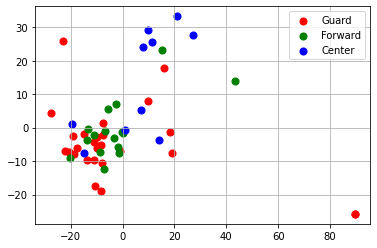

In [10]:
# Visualize
pca = PCA(n_components=2, random_state = 1)
principalComponents = pca.fit_transform(featVecs_test)

colormaps = ["red", "green", "blue"]
posS = ['Guard','Forward','Center']
    
pred_test = np.array(pred_test)
for iPos in range(0, 3):
    plt.scatter(principalComponents[pred_test == (iPos), 0], principalComponents[pred_test == (iPos), 1], s=50, c=colormaps[iPos],  label=posS[iPos])
    
plt.legend(scatterpoints=1, loc='best')
plt.grid()
plt.show()


## FINAL COMMENTS
Although ~0.71 doesn't seem to be the best model ever... Is the model performing poorly? Not for me! When building Machine Learning models, sometimes you don't need to have the best accuracy in a tuned model with hundreds of hyperparameters; instead, sometimes it is worth thinking about the intrinsic details of the given classes and recognize the failure patterns.
In this concrete study, the classification in only three position is poor, in basketball is common five positions Point Guard, Shotting Guard, Small Forward, Power Forward and Center. 
There players that can play in two or three different position and this leads to missclassification.

Also, the stats used are basics. Nowadays is used advanced stats that helps to analyze better the playes like efective field gold or floor percentatge. These new stats will likely improve the accuracy of the model. The weight and height are helpful.
Also I'm not finetunned the models to avoid overfitting, begging trees or changing the voting policy, for exemple. 

Lastly, all these algorithms are supervised. To create new labels we may use unsupervised algorithms to create five o more differents cluster(positions) that fits better with the data. I suggest K-means or Hierarchical clustering to create the cluster. We can see in the visualitzation that maybe exists more groups.

